In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("Power-Networks-LCL.csv")

In [5]:
df.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.0,ACORN-A,Affluent


In [6]:
df.tail()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped
999966,MAC000036,Std,2012-11-08 08:00:00.0000000,0.228,ACORN-E,Affluent
999967,MAC000036,Std,2012-11-08 08:30:00.0000000,0.042,ACORN-E,Affluent
999968,MAC000036,Std,2012-11-08 09:00:00.0000000,0.076,ACORN-E,Affluent
999969,MAC000036,Std,2012-11-08 09:30:00.0000000,0.070,ACORN-E,Affluent
999970,MAC000036,Std,2012-11-08 10:00:00.0000000,0.005,ACORN-E,Affluent


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999971 entries, 0 to 999970
Data columns (total 6 columns):
LCLid            999971 non-null object
stdorToU         999971 non-null object
DateTime         999971 non-null object
KWh              999971 non-null float64
Acorn            999971 non-null object
Acorn_grouped    999971 non-null object
dtypes: float64(1), object(5)
memory usage: 45.8+ MB


In [8]:
df.describe()

,KWh
count,999971.000000
mean,0.239580
std,0.387533
min,0.000000
25%,0.060000
50%,0.129000
75%,0.255000
max,6.528000


In [7]:
df.size

5999826

In [8]:
df.shape

(999971, 6)

In [9]:
df["Date"] = pd.to_datetime(df["DateTime"]).dt.date
df["Time"] = pd.to_datetime(df["DateTime"]).dt.time

In [10]:
df_dt = df
df_dt.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped,Date,Time
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,00:30:00
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,01:00:00
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,01:30:00
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,02:00:00
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,02:30:00


In [11]:
df_dt[df_dt["KWh"] == df_dt["KWh"].max()]

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped,Date,Time
926523,MAC000034,Std,2013-02-13 00:00:00.0000000,6.528,ACORN-E,Affluent,2013-02-13,00:00:00


In [12]:
df_dt[df_dt["KWh"] == df_dt["KWh"].min()]

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped,Date,Time
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,00:30:00
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,01:00:00
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,01:30:00
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,02:00:00
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,02:30:00
5,MAC000002,Std,2012-10-12 03:00:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,03:00:00
6,MAC000002,Std,2012-10-12 03:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,03:30:00
7,MAC000002,Std,2012-10-12 04:00:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,04:00:00
8,MAC000002,Std,2012-10-12 04:30:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,04:30:00
9,MAC000002,Std,2012-10-12 05:00:00.0000000,0.0,ACORN-A,Affluent,2012-10-12,05:00:00


In [11]:
df_dt.drop(list(df_dt[df_dt["KWh"] == df_dt["KWh"].min()].index), axis=0, inplace=True)

In [14]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 954433 entries, 21 to 999970
Data columns (total 8 columns):
LCLid            954433 non-null object
stdorToU         954433 non-null object
DateTime         954433 non-null object
KWh              954433 non-null float64
Acorn            954433 non-null object
Acorn_grouped    954433 non-null object
Date             954433 non-null object
Time             954433 non-null object
dtypes: float64(1), object(7)
memory usage: 40.0+ MB


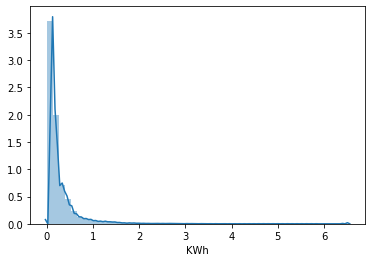

In [15]:
sns.distplot(df_dt["KWh"])

In [12]:
df_dt["Year"] = pd.DatetimeIndex(df["Date"]).year

In [13]:
df_dt["Month"] = pd.DatetimeIndex(df["Date"]).month

In [14]:
df_dt["Day"] = pd.DatetimeIndex(df["Date"]).day

In [15]:
df_dt["Hour"] = pd.to_datetime(df["DateTime"]).dt.hour

In [16]:
df_dt["Minute"] = pd.to_datetime(df["DateTime"]).dt.minute

In [83]:
df_dt.head()

,LCLid,stdorToU,DateTime,KWh,Acorn,Acorn_grouped,Date,Time,Year,Month,Day,Hour,Minute
21,MAC000002,Std,2012-10-12 11:30:00.0000000,0.143,ACORN-A,Affluent,2012-10-12,11:30:00,2012,10,12,11,30
22,MAC000002,Std,2012-10-12 12:00:00.0000000,0.663,ACORN-A,Affluent,2012-10-12,12:00:00,2012,10,12,12,0
23,MAC000002,Std,2012-10-12 12:30:00.0000000,0.256,ACORN-A,Affluent,2012-10-12,12:30:00,2012,10,12,12,30
24,MAC000002,Std,2012-10-12 13:00:00.0000000,0.155,ACORN-A,Affluent,2012-10-12,13:00:00,2012,10,12,13,0
25,MAC000002,Std,2012-10-12 13:30:00.0000000,0.199,ACORN-A,Affluent,2012-10-12,13:30:00,2012,10,12,13,30


In [22]:
df_dt["Year"].unique()

array([2012, 2013, 2014, 2011], dtype=int64)

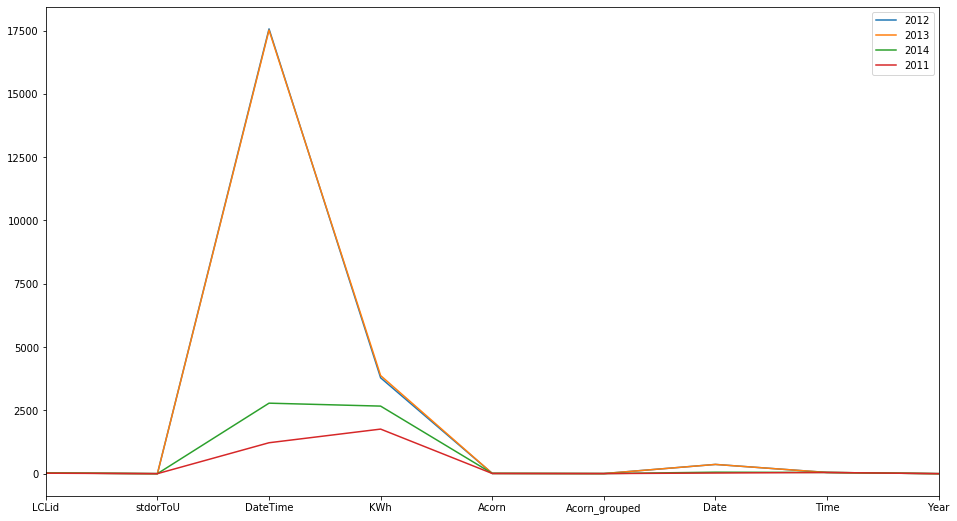

In [37]:
fig, ax = plt.subplots()
for year in df_dt["Year"].unique():
#     print(f"YEAR - {year}")
#     print("*"*10)
#     print(df_dt[df_dt["Year"] == year].nunique())
#     print("*"*10)
    df_dt[df_dt["Year"] == year].nunique().plot(ax=ax, figsize=(16, 9))
ax.legend(df_dt["Year"].unique())

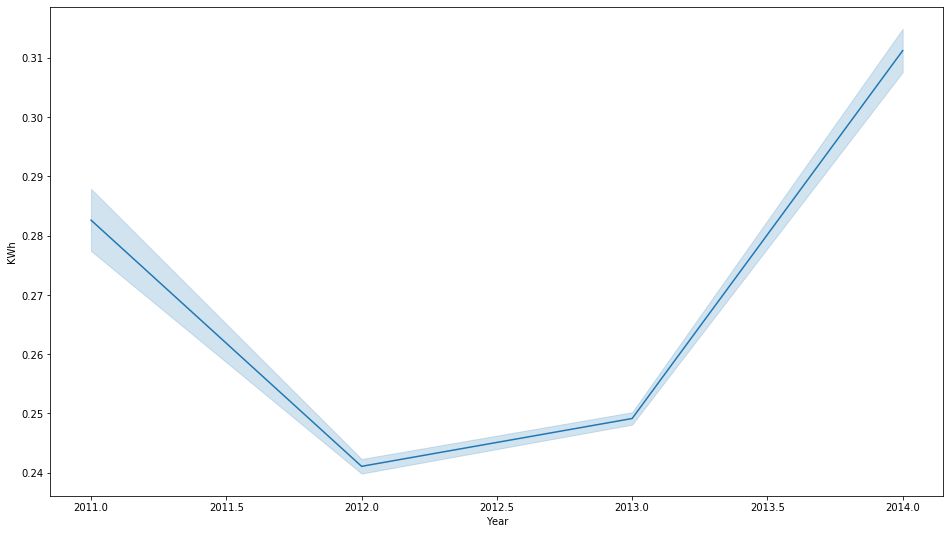

In [50]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_dt["Year"], y=df_dt["KWh"], data=df_dt, ax=ax)

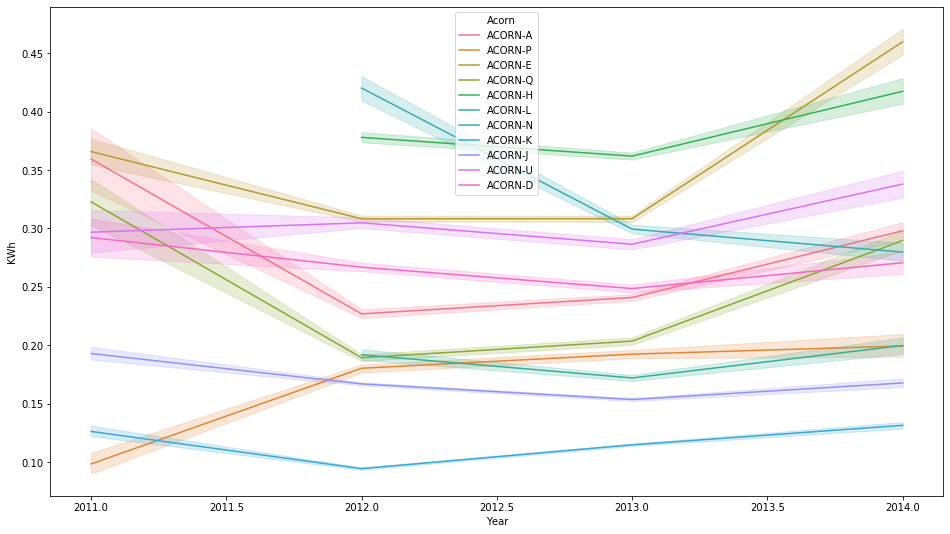

In [48]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_dt["Year"], y=df_dt["KWh"], hue=df_dt["Acorn"], data=df_dt, ax=ax)

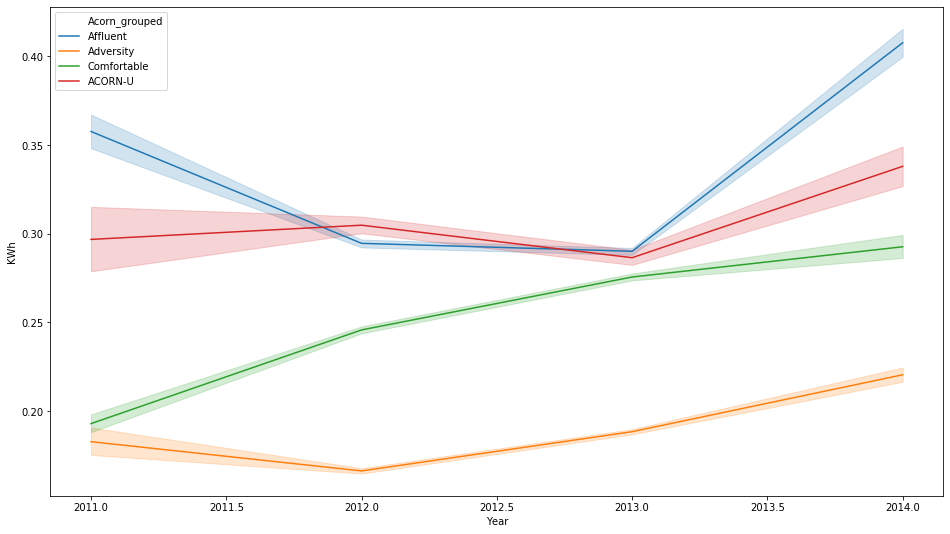

In [49]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_dt["Year"], y=df_dt["KWh"], hue=df_dt["Acorn_grouped"], data=df_dt, ax=ax)

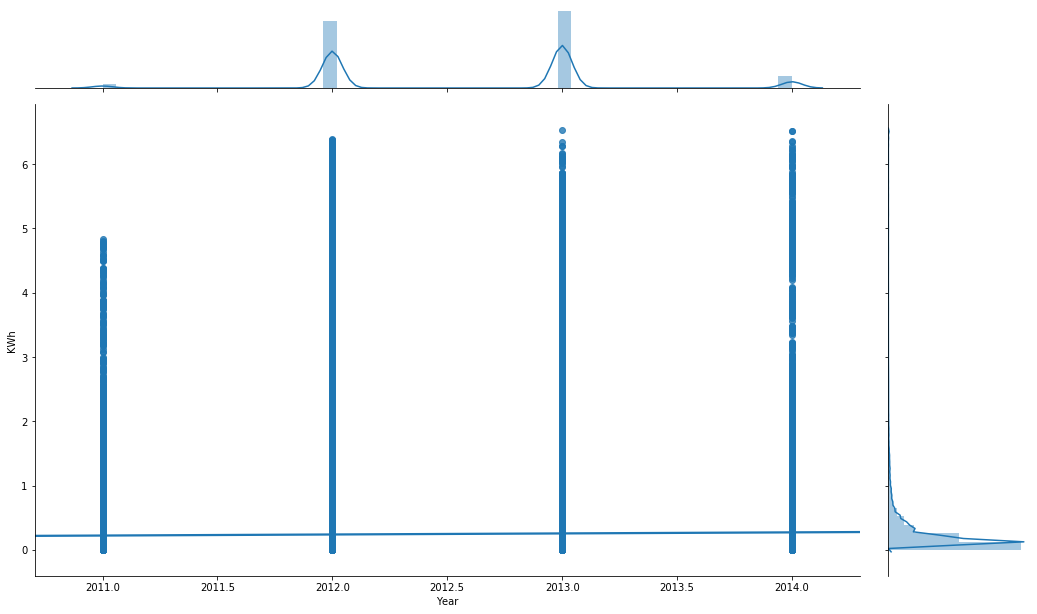

In [47]:
grid = sns.jointplot(x=df_dt["Year"], y=df_dt["KWh"], data=df_dt, kind="reg")
grid.fig.set_figwidth(16)
grid.fig.set_figheight(9)
grid.savefig("Energy_VS_Year_REG.png", dpi=300)

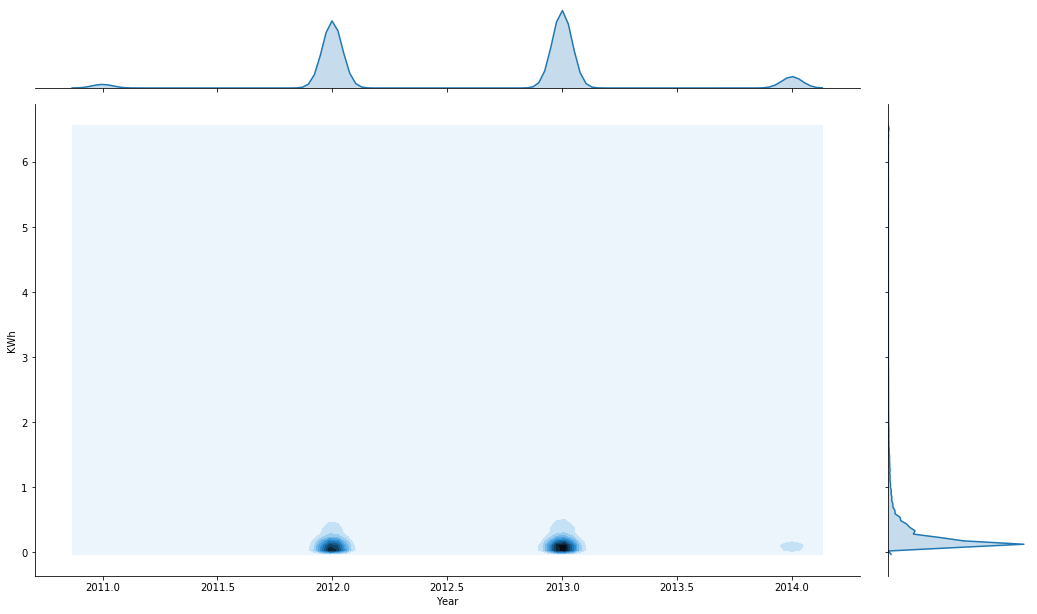

In [58]:
grid = sns.jointplot(x=df_dt["Year"], y=df_dt["KWh"], data=df_dt, kind="kde")
grid.fig.set_figwidth(16)
grid.fig.set_figheight(9)
grid.savefig("Energy_VS_Year_KDE.png", dpi=300)

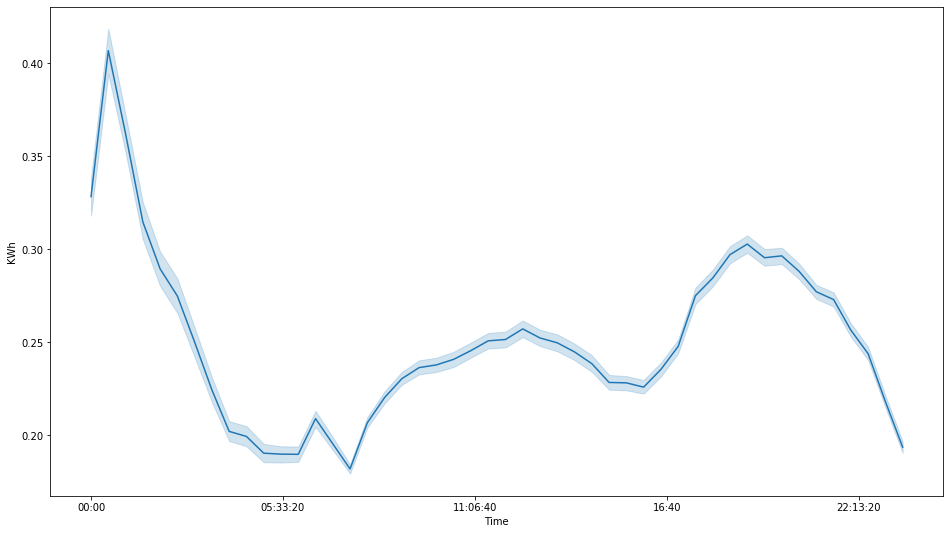

In [61]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_dt["Time"], y=df_dt["KWh"], data=df_dt, ax=ax)

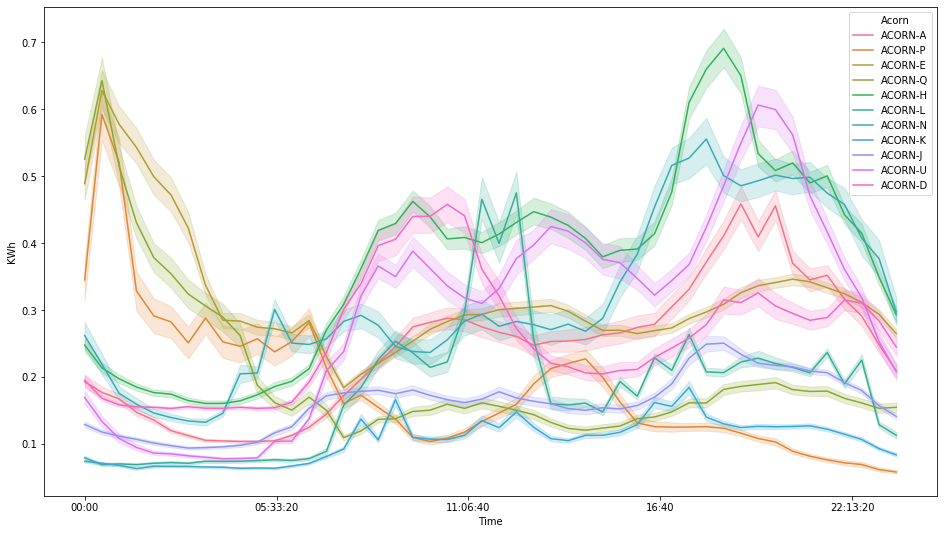

In [66]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_dt["Time"], y=df_dt["KWh"], hue=df_dt["Acorn"], data=df_dt, ax=ax)

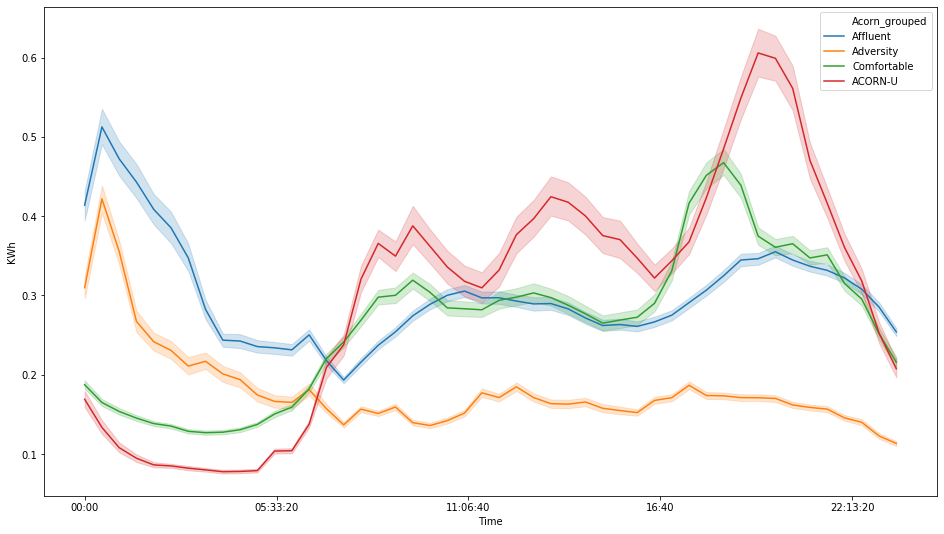

In [67]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_dt["Time"], y=df_dt["KWh"], hue=df_dt["Acorn_grouped"], data=df_dt, ax=ax)

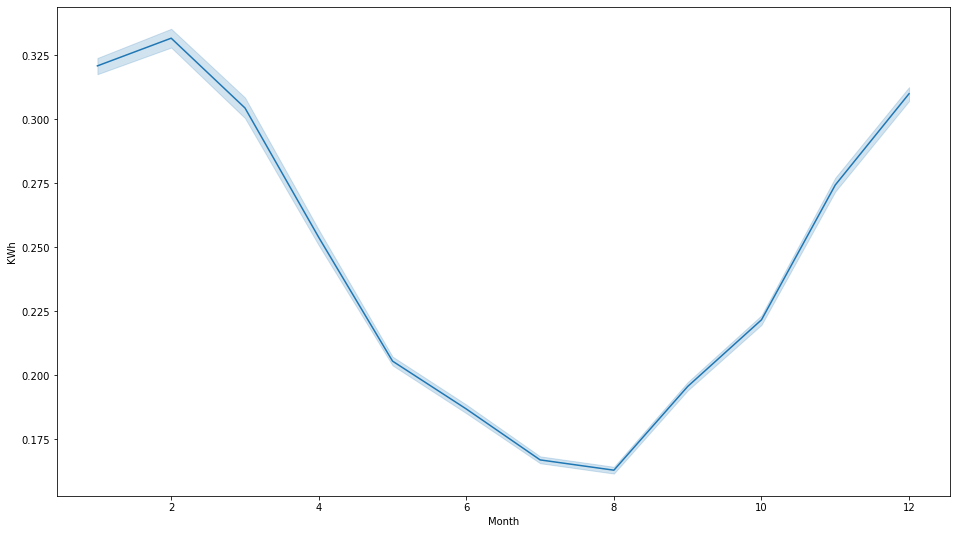

In [65]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_dt["Month"], y=df_dt["KWh"], data=df_dt, ax=ax)

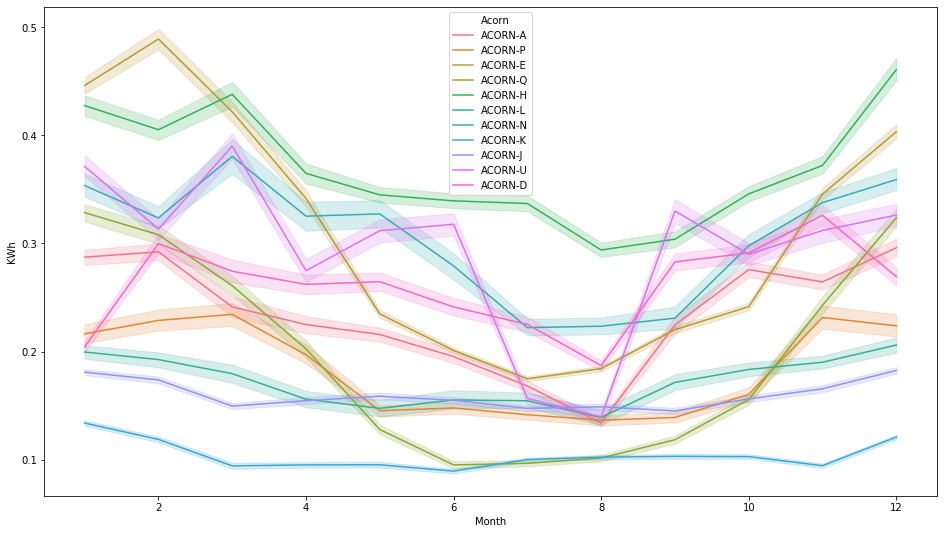

In [68]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_dt["Month"], y=df_dt["KWh"], hue=df_dt["Acorn"], data=df_dt, ax=ax)

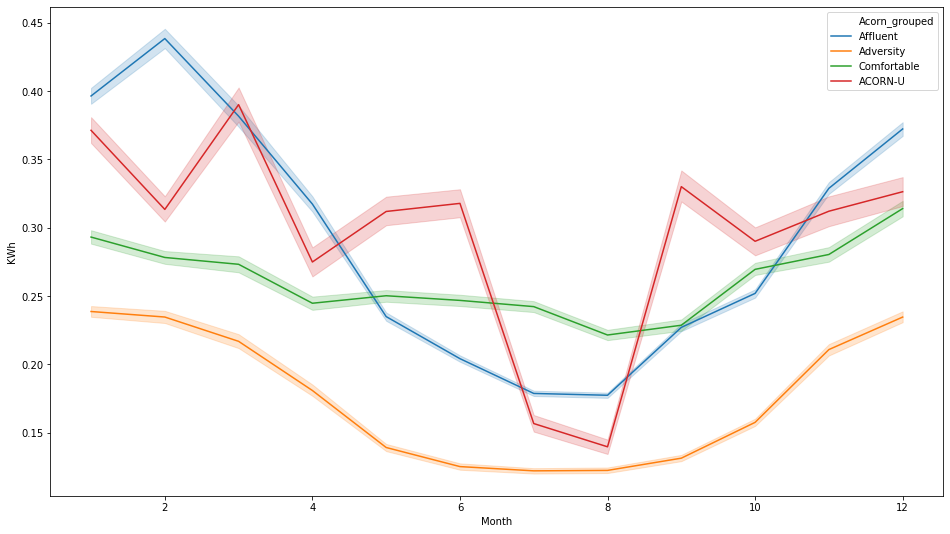

In [69]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_dt["Month"], y=df_dt["KWh"], hue=df_dt["Acorn_grouped"], data=df_dt, ax=ax)

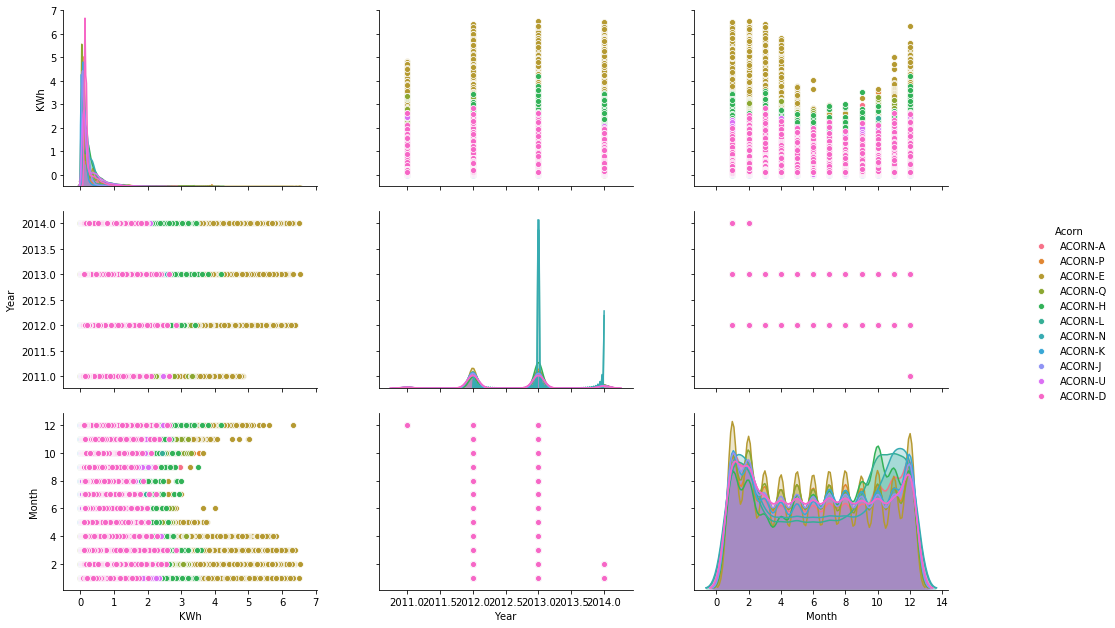

In [70]:
grid = sns.pairplot(df_dt, hue="Acorn")
grid.fig.set_figwidth(16)
grid.fig.set_figheight(9)
grid.savefig("PairPlot.png", dpi=300)

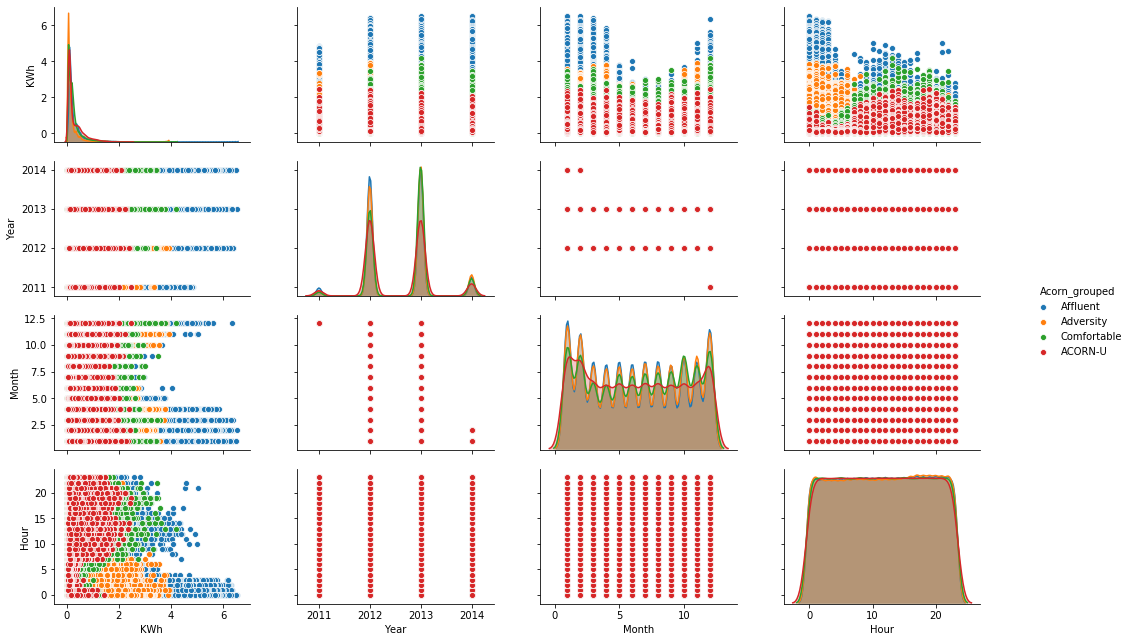

In [73]:
grid = sns.pairplot(df_dt, hue="Acorn_grouped")
grid.fig.set_figwidth(16)
grid.fig.set_figheight(9)
grid.savefig("PairPlot_Grouped.png", dpi=300)

In [17]:
df_dt.drop(["DateTime", "stdorToU", "Date", "Time"], axis=1, inplace=True)

In [18]:
df_affluent = df_dt[df_dt["Acorn_grouped"] == "Affluent"]
df_adversity = df_dt[df_dt["Acorn_grouped"] == "Adversity"]
df_comfortable = df_dt[df_dt["Acorn_grouped"] == "Comfortable"]
df_acorn_u = df_dt[df_dt["Acorn_grouped"] == "ACORN-U"]

In [25]:
df_affluent.shape

(406350, 9)

In [26]:
df_adversity.shape

(354767, 9)

In [27]:
df_comfortable.shape

(154248, 9)

In [28]:
df_acorn_u.shape

(39068, 9)

In [29]:
df_affluent.head()

,LCLid,KWh,Acorn,Acorn_grouped,Year,Month,Day,Hour,Minute
21,MAC000002,0.143,ACORN-A,Affluent,2012,10,12,11,30
22,MAC000002,0.663,ACORN-A,Affluent,2012,10,12,12,0
23,MAC000002,0.256,ACORN-A,Affluent,2012,10,12,12,30
24,MAC000002,0.155,ACORN-A,Affluent,2012,10,12,13,0
25,MAC000002,0.199,ACORN-A,Affluent,2012,10,12,13,30


In [30]:
df_affluent.LCLid.unique()

array(['MAC000002', 'MAC000004', 'MAC000012', 'MAC000018', 'MAC000021',
       'MAC000024', 'MAC000026', 'MAC000028', 'MAC000030', 'MAC000033',
       'MAC000034', 'MAC000035', 'MAC000036'], dtype=object)

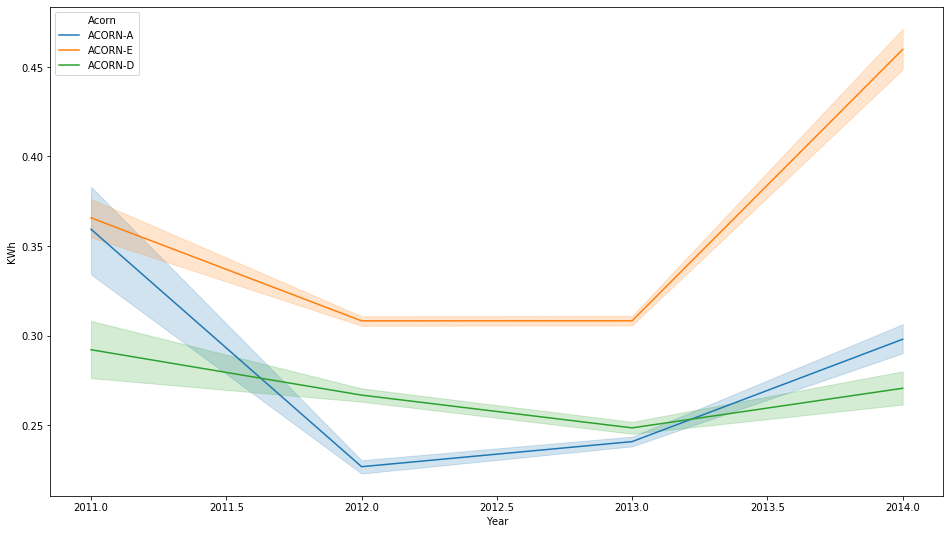

In [102]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_affluent["Year"], y=df_affluent["KWh"], hue=df_affluent["Acorn"], data=df_affluent, ax=ax)
ax.set_title("Affluent Yearly")

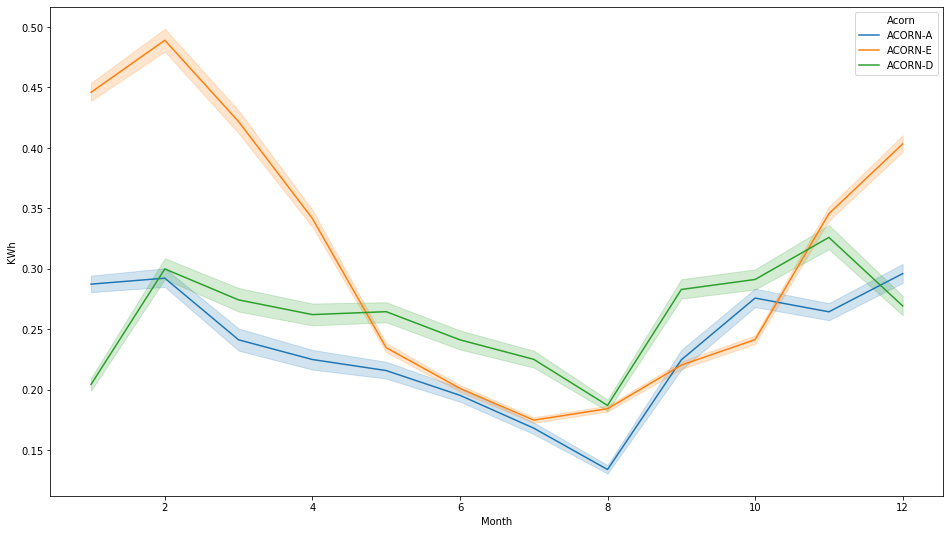

In [99]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_affluent["Month"], y=df_affluent["KWh"], hue=df_affluent["Acorn"], data=df_affluent, ax=ax)
ax.set_title("Affluent Monthly")

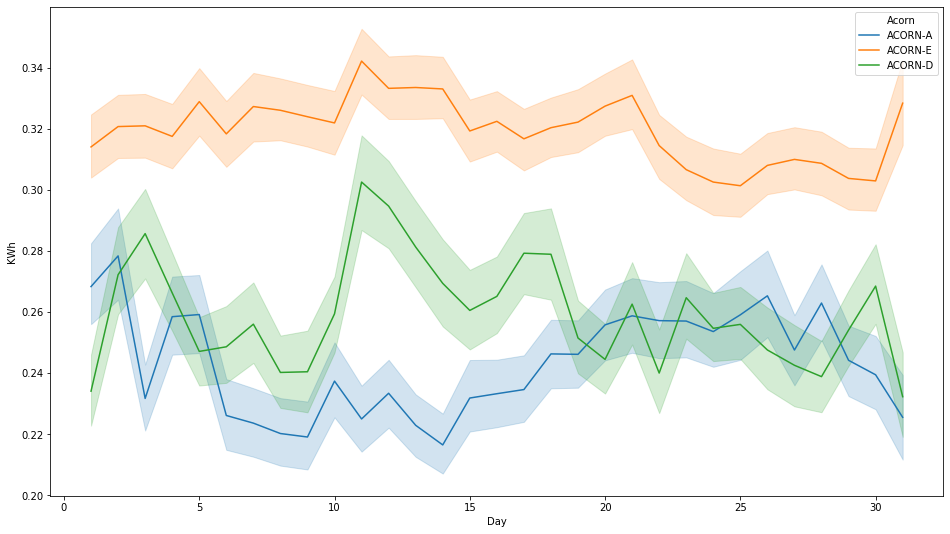

In [100]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_affluent["Day"], y=df_affluent["KWh"], hue=df_affluent["Acorn"], data=df_affluent, ax=ax)
ax.set_title("Affluent Daily")

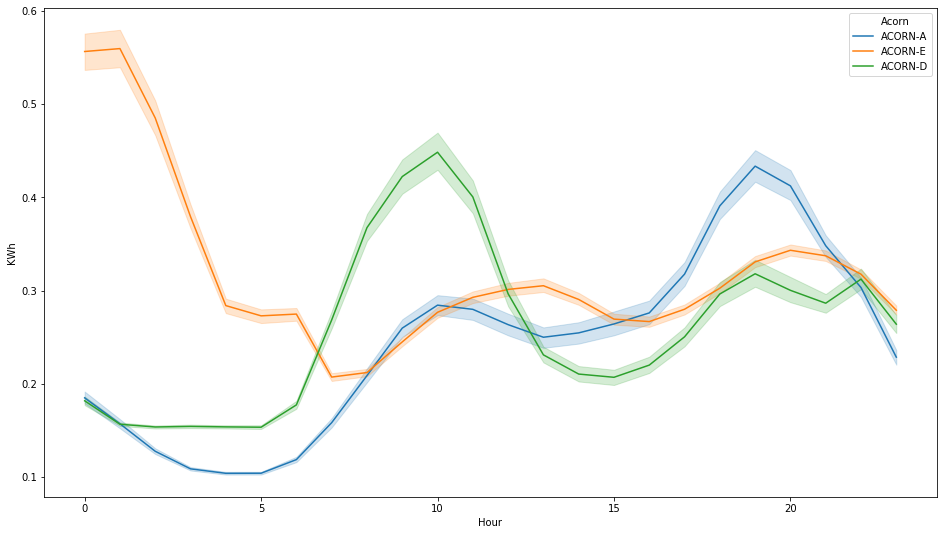

In [101]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_affluent["Hour"], y=df_affluent["KWh"], hue=df_affluent["Acorn"], data=df_affluent, ax=ax)
ax.set_title("Affluent Hourly")

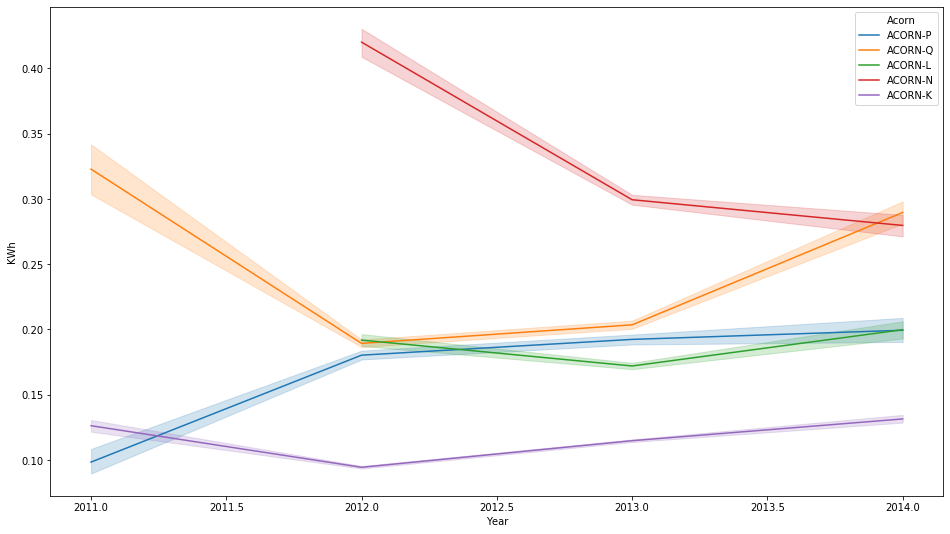

In [103]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_adversity["Year"], y=df_adversity["KWh"], hue=df_adversity["Acorn"], data=df_adversity, ax=ax)
ax.set_title("Adversity Yearly")

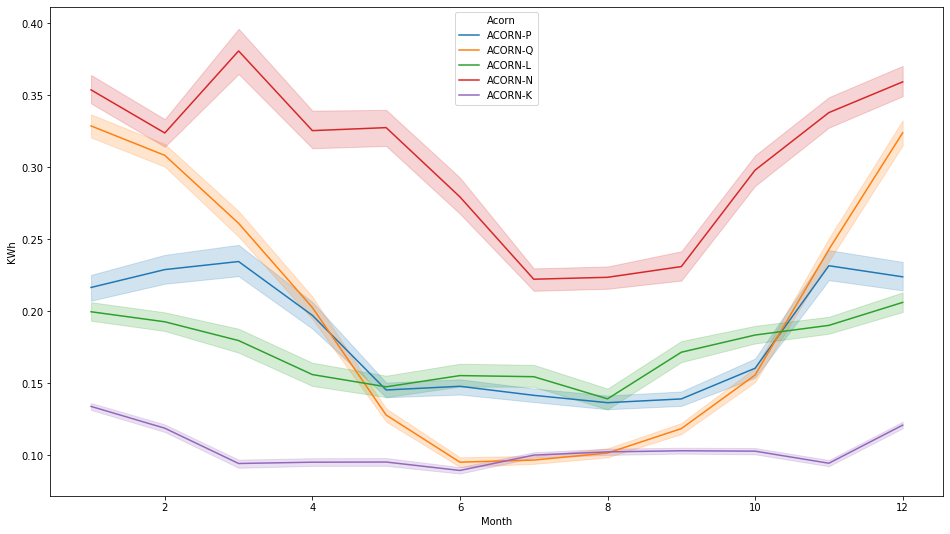

In [104]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_adversity["Month"], y=df_adversity["KWh"], hue=df_adversity["Acorn"], data=df_adversity, ax=ax)
ax.set_title("Adversity Monthly")

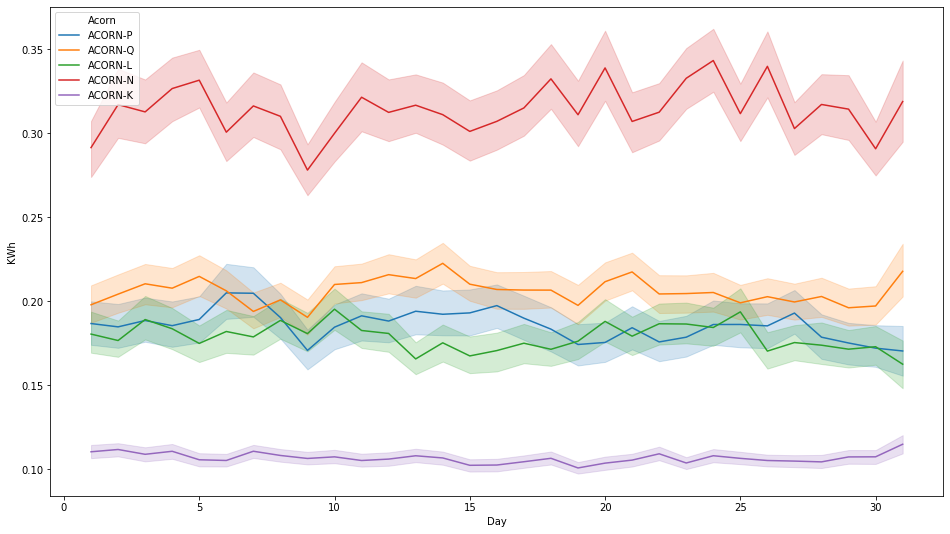

In [105]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_adversity["Day"], y=df_adversity["KWh"], hue=df_adversity["Acorn"], data=df_adversity, ax=ax)
ax.set_title("Adversity Daily")

Text(0.5, 1.0, 'Adversity Hourly')

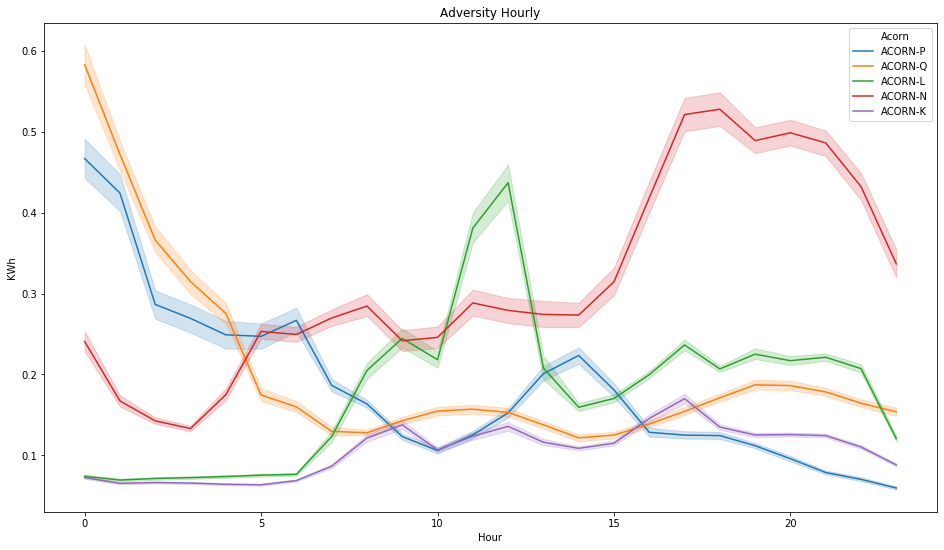

In [110]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_adversity["Hour"], y=df_adversity["KWh"], hue=df_adversity["Acorn"], data=df_adversity, ax=ax)
ax.set_title("Adversity Hourly")

Text(0.5, 1.0, 'Comfortable Yearly')

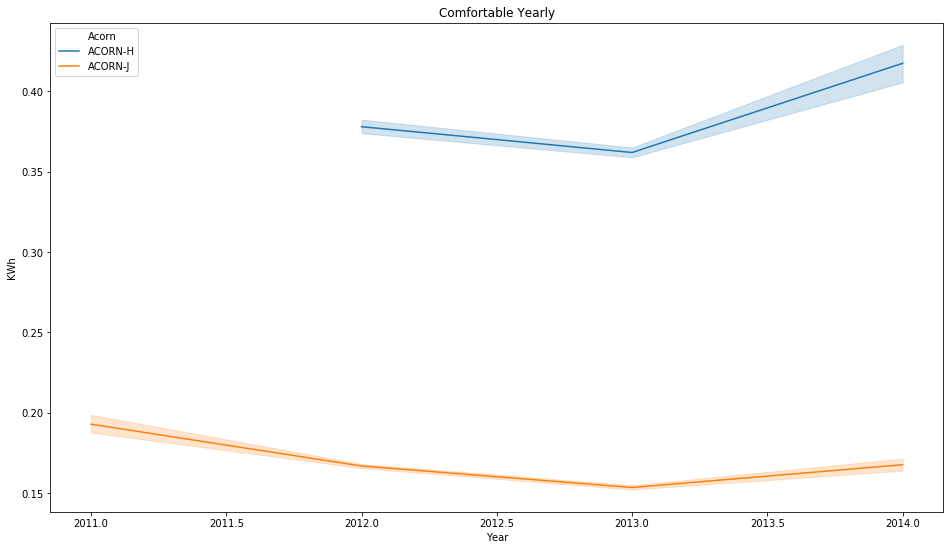

In [111]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_comfortable["Year"], y=df_comfortable["KWh"], hue=df_comfortable["Acorn"], data=df_comfortable, ax=ax)
ax.set_title("Comfortable Yearly")

Text(0.5, 1.0, 'Comfortable Monthly')

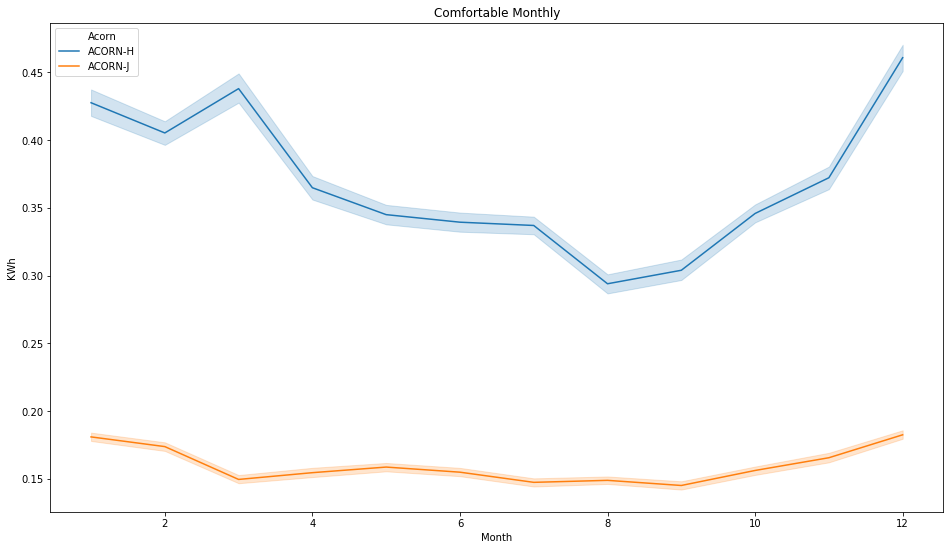

In [112]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_comfortable["Month"], y=df_comfortable["KWh"], hue=df_comfortable["Acorn"], data=df_comfortable, ax=ax)
ax.set_title("Comfortable Monthly")

Text(0.5, 1.0, 'Comfortable Daily')

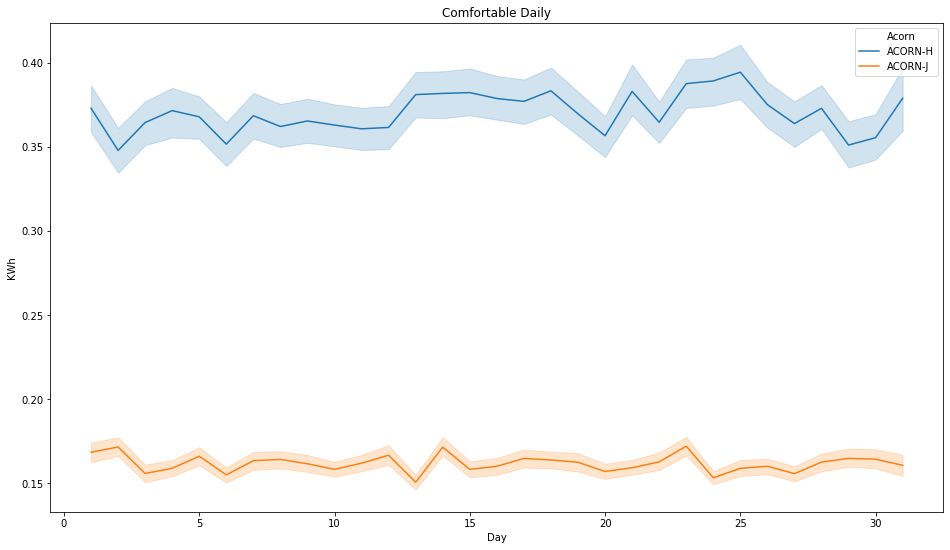

In [113]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_comfortable["Day"], y=df_comfortable["KWh"], hue=df_comfortable["Acorn"], data=df_comfortable, ax=ax)
ax.set_title("Comfortable Daily")

Text(0.5, 1.0, 'Comfortable Hourly')

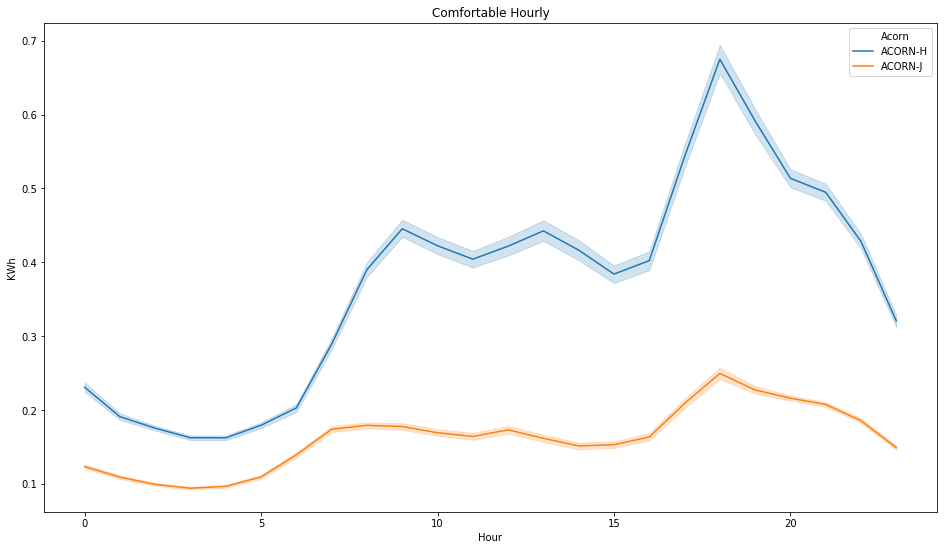

In [114]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_comfortable["Hour"], y=df_comfortable["KWh"], hue=df_comfortable["Acorn"], data=df_comfortable, ax=ax)
ax.set_title("Comfortable Hourly")

Text(0.5, 1.0, 'ACORN-U Yearly')

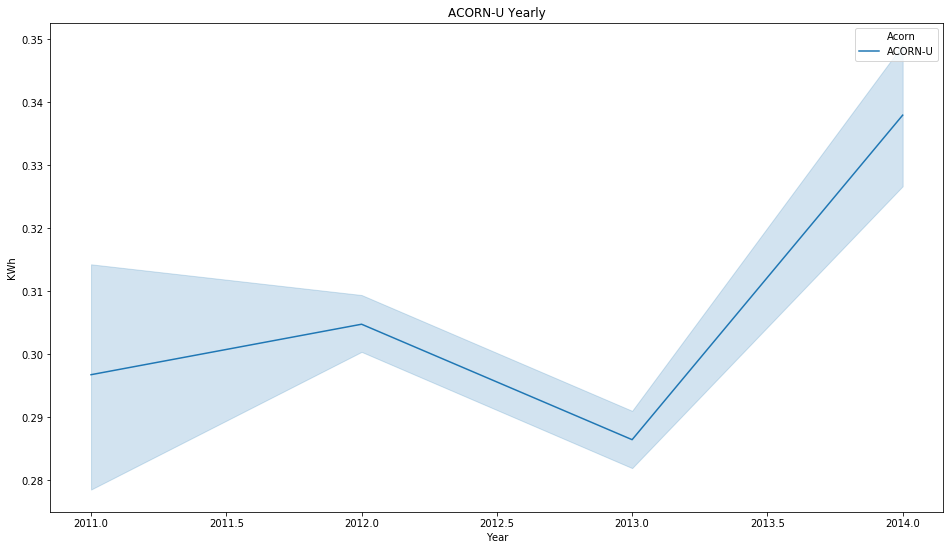

In [116]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_acorn_u["Year"], y=df_acorn_u["KWh"], hue=df_acorn_u["Acorn"], data=df_acorn_u, ax=ax)
ax.set_title("ACORN-U Yearly")

Text(0.5, 1.0, 'ACORN-U Monthly')

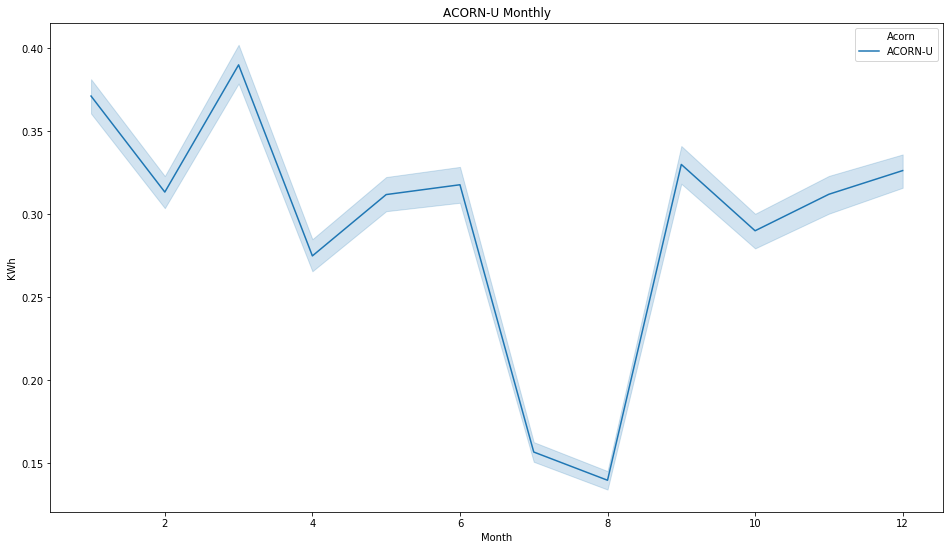

In [117]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_acorn_u["Month"], y=df_acorn_u["KWh"], hue=df_acorn_u["Acorn"], data=df_acorn_u, ax=ax)
ax.set_title("ACORN-U Monthly")

Text(0.5, 1.0, 'ACORN-U Daily')

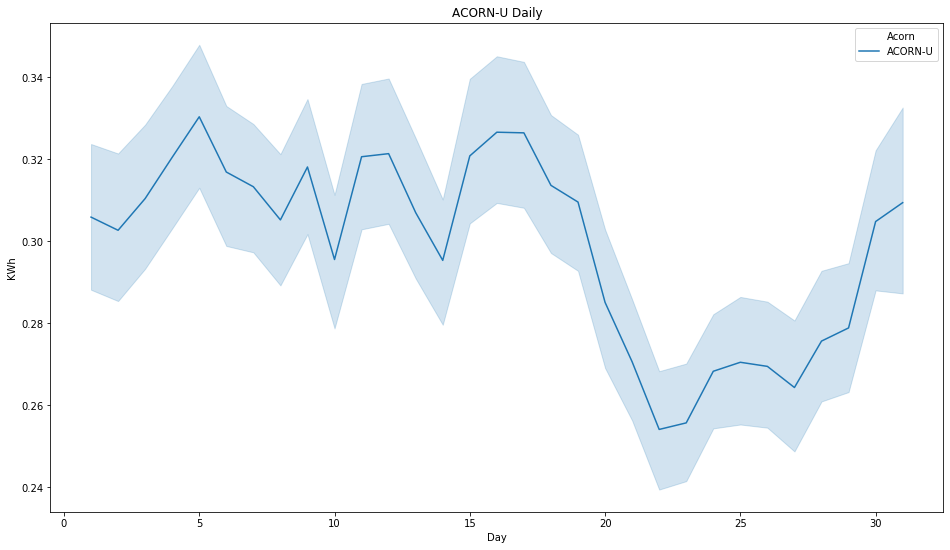

In [118]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_acorn_u["Day"], y=df_acorn_u["KWh"], hue=df_acorn_u["Acorn"], data=df_acorn_u, ax=ax)
ax.set_title("ACORN-U Daily")

Text(0.5, 1.0, 'ACORN-U Hourly')

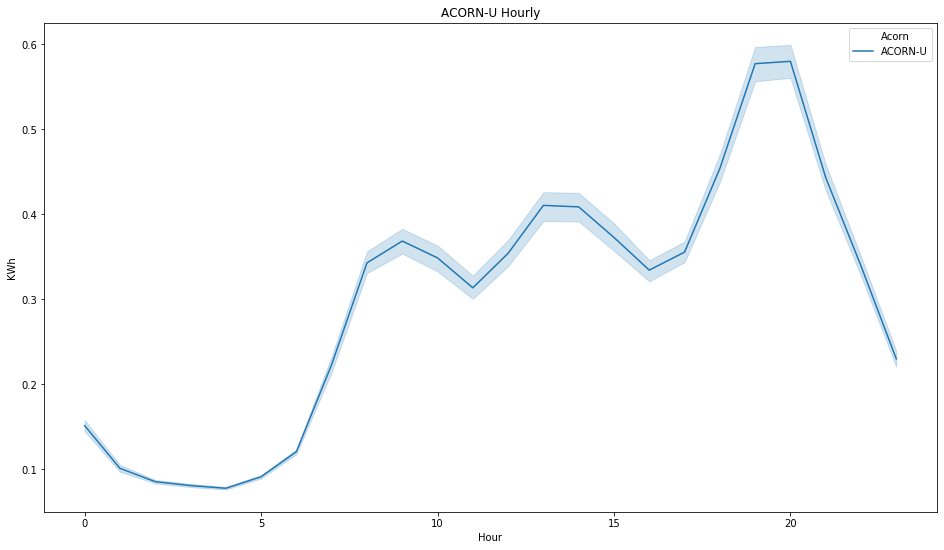

In [121]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=df_acorn_u["Hour"], y=df_acorn_u["KWh"], hue=df_acorn_u["Acorn"], data=df_acorn_u, ax=ax)
ax.set_title("ACORN-U Hourly")

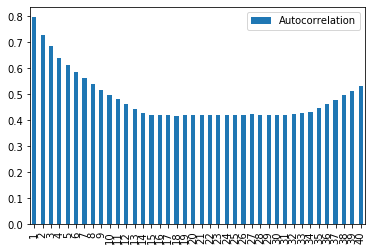

In [41]:
df_acf = acf(df_affluent["KWh"])[1:50]
test_df = pd.DataFrame([df_acf]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind="bar")

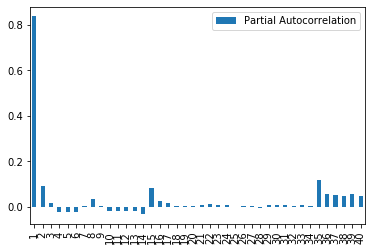

In [112]:
df_acf = pacf(df_affluent["KWh"])[1:50]
test_df = pd.DataFrame([df_acf]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind="bar")

In [116]:
result = ts.adfuller(df_dt["KWh"], 1)
result

(-317.0360521396418,
 0.0,
 0,
 954432,
 {'1%': -3.430356851528016,
  '5%': -2.8615430282979157,
  '10%': -2.5667716118518062},
 -90312.4179914121)

In [ ]:
data_df["WorkingDay"] = data.DATE_TIME.apply(lambda x: 1 if x.dayofweek > 5 else 0  )